# Exploring Weather Trends - Project Instructions (Stefan Cornelißen)

## Extract the data

In order to extract the data, I wrote and applied the following SQL queries.

## Loading sources data into dataframes and lists for visualization

After downloading the .csv-Files, I chose to analyze them using Python. The following code-segment loads the csv-files into dataframes and prepares them for plotting.

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as numpy

#Defining a variable for the local city name, city of Hamburg, Germany
str_local = "Hamburg"
#Loading CSV-files (from the same folder) into dataframes
df_temperature_global = pd.read_csv('temperature_global.csv')
df_temperature_local = pd.read_csv('temperature_hamburg.csv') 

#Separating the dataframes in to order to only load x- and y variables for plotting 
x_global = df_temperature_global['year']
y_global = df_temperature_global['avg_temp']

x_local = df_temperature_local['year']
y_local = df_temperature_local['avg_temp']

Plotting the raw data, separated and combined, without any smoothing or calculations in order to get to know the data before visualizing. The graphs are shown below the following code segment.

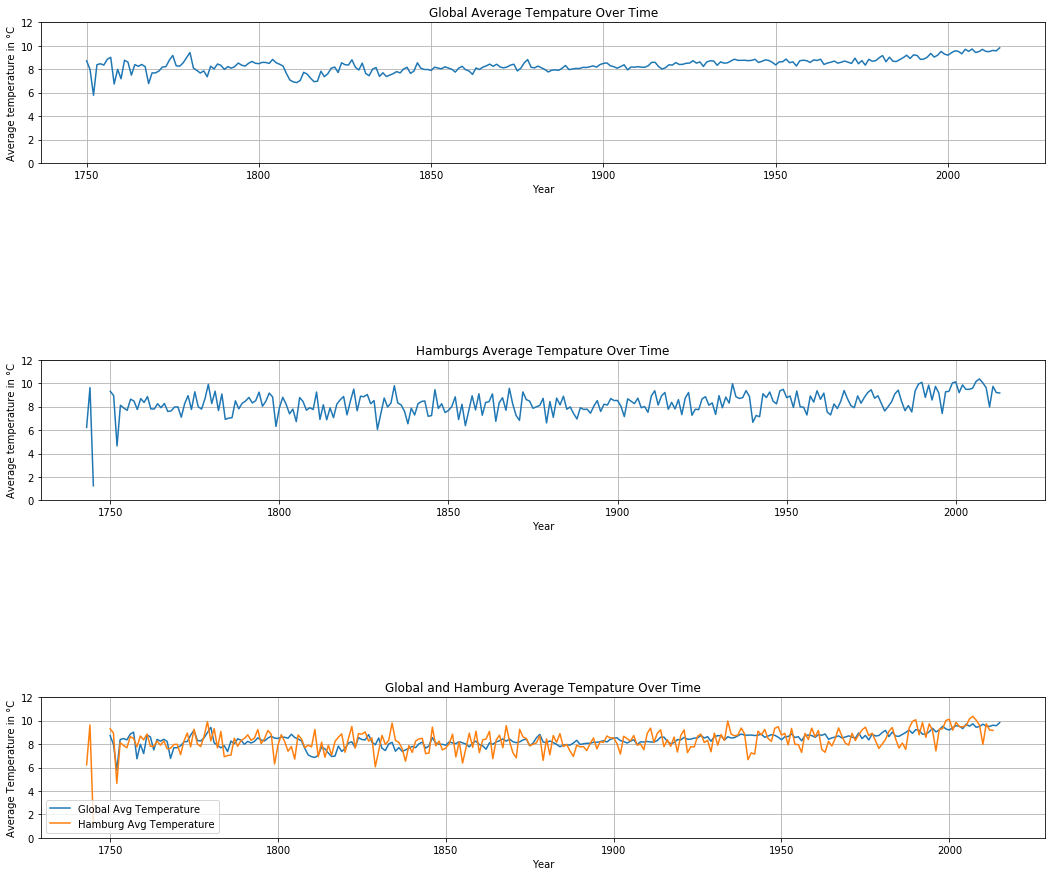

In [4]:
# Styling the graphs
fig = plt.figure(figsize=(18,15)) 

# Defining the graphs, scale, titels, legend, plot order
plt.subplot(5, 1, 1) # Creating a subplot of 5 slots, in 1 colum, using the 1st slot to draw the graph.
plt.plot(x_global,y_global)
plt.title('Global Average Tempature Over Time')
plt.xlabel('Year')
plt.ylabel('Average temperature in °C')
plt.grid(True)
plt.ylim((0,12)) # Defining uniformed y-scales

plt.subplot(5, 1, 3)
plt.plot(x_local,y_local)
plt.title(str_local + 's Average Tempature Over Time')
plt.xlabel('Year')
plt.ylabel('Average temperature in °C')
plt.grid(True)
plt.ylim((0,12))

plt.subplot(5, 1, 5)
plt.plot(x_global,y_global, label='Global Avg Temperature')
plt.plot(x_local,y_local, label= str_local + ' Avg Temperature')
plt.title('Global and ' + str_local + ' Average Tempature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature in °C')
plt.grid(True)
plt.ylim((0,12))
plt.legend(loc = 3)
print('\n')

## Key Considerations for Visualization

In order to read the data and to draw conclusions about the content a smoothing is necessary. 
The suggested concept of "Moving averages" should smooth the lines, so that trends should become visible. 
In order to find the right level of smoothing, I applied three incremental levels of smoothing: 1st 3 years, 2nd 6 years and 3rd 9 years. The challenge is to smooth as much as needed to observe trends, but not to smooth too much, that fluctuations or outliers become invisible resulting in a poor analysis. To me, the smoothing level of 9 years, does its job best. Periods with higher fluctuations than usual are still observable. That means, we still can identify suspicious periods or extraordinary years, while the overall upwards trend of the two lines became visible.



The global average temperature in the period from 1750 and 2015 was: 8.3695 °C.


The average temperature in Hamburg in the period from 1743 and 2013 was: 8.2994 °C.


The temperature difference is 0.0701 °C.


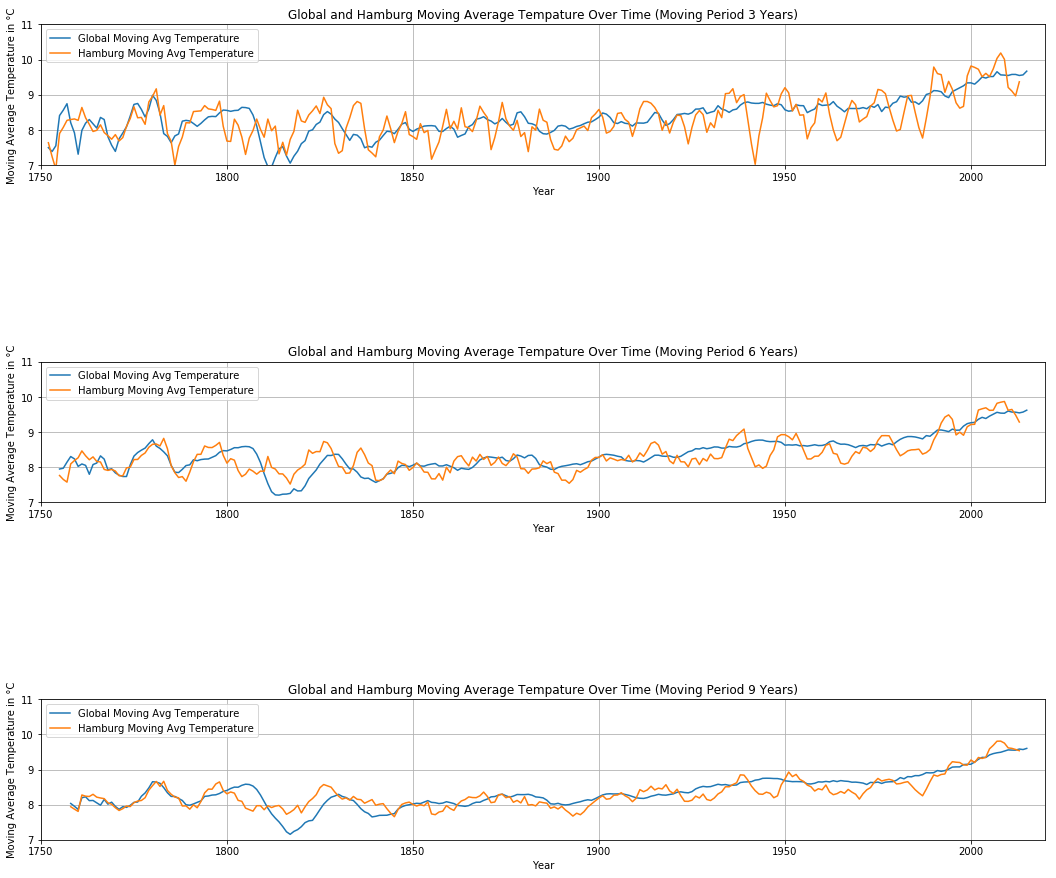

In [11]:
# Styling the graphs
fig = plt.figure(figsize=(18,15)) 

window_value = 3 # Defining the window-value of moving/rolling average in years. In this example, 
# the average of the surrounding three years of a value is calculated.
# Calculating the moving averages globally und locally
y_global_mov_avg = pd.DataFrame(y_global.rolling(window = window_value).mean())
y_local_mov_avg = pd.DataFrame(y_local.rolling(window = window_value).mean())

plt.subplot(5, 1, 1) # Creating a subplot of 5 slots, in 1 colum, using the 1st slot to draw the graph.
plt.plot(x_global,y_global_mov_avg, label='Global Moving Avg Temperature')
plt.plot(x_local,y_local_mov_avg, label= str_local + ' Moving Avg Temperature')
plt.title('Global and ' + str_local + ' Moving Average Tempature Over Time (Moving Period ' + str(window_value) + ' Years)')
plt.xlabel('Year')
plt.ylabel('Moving Average Temperature in °C')
plt.grid(True)
plt.xlim((1750,2020)) #Defining uniformed x- and y-scales in order to be able to compare by eye.
plt.ylim((7,11))
plt.legend(loc = 2)


window_value = 6 # Defining the window-value of moving/rolling average in years
#Calculating the moving averages globally und locally
y_global_mov_avg = pd.DataFrame(y_global.rolling(window = window_value).mean())
y_local_mov_avg = pd.DataFrame(y_local.rolling(window = window_value).mean())

plt.subplot(5, 1, 3) # Defining the graphs, with adjusted y- / x-scales and sizes
plt.plot(x_global,y_global_mov_avg, label='Global Moving Avg Temperature')
plt.plot(x_local,y_local_mov_avg, label= str_local + ' Moving Avg Temperature')
plt.title('Global and ' + str_local + ' Moving Average Tempature Over Time (Moving Period ' + str(window_value) + ' Years)')
plt.xlabel('Year')
plt.ylabel('Moving Average Temperature in °C')
plt.grid(True)
plt.xlim((1750,2020))
plt.ylim((7,11))
plt.legend(loc = 2)

window_value = 9 # Defining the window-value of moving/rolling average in years
#Calculating the moving averages globally und locally
y_global_mov_avg = pd.DataFrame(y_global.rolling(window = window_value).mean())
y_local_mov_avg = pd.DataFrame(y_local.rolling(window = window_value).mean())

plt.subplot(5, 1, 5) # Defining the graphs, with adjusted y- / x-scales and sizes
plt.plot(x_global,y_global_mov_avg, label='Global Moving Avg Temperature')
plt.plot(x_local,y_local_mov_avg, label= str_local + ' Moving Avg Temperature')
plt.title('Global and ' + str_local + ' Moving Average Tempature Over Time (Moving Period ' + str(window_value) + ' Years)')
plt.xlabel('Year')
plt.ylabel('Moving Average Temperature in °C')
plt.grid(True)
plt.xlim((1750,2020))
plt.ylim((7,11))
plt.legend(loc = 2)

# Calculate min and max common years with valid data of global and local temperature data 
min_year_global = min(x_global)
max_year_global = max(x_global)
min_year_local = min(x_local)
max_year_local = max(x_local)

# Calculating simple averages of global and local temperatures.
avg_value_y_global = numpy.mean(y_global)
avg_value_y_local = numpy.mean(y_local)
print('\n')
print('The global average temperature in the period from ' + str(min_year_global) + ' and ' + str(max_year_global) + ' was: ' 
      + str(round(avg_value_y_global,4)) + ' °C.')
print('\n')
print('The average temperature in ' + str_local + ' in the period from ' + str(min_year_local) + ' and ' + 
      str(max_year_local) + ' was: ' + str(round(avg_value_y_local,4)) + ' °C.')
print('\n')
print('The temperature difference is ' + str(round(avg_value_y_global-avg_value_y_local,4)) + ' °C.')

## Observations

The chosen unit of observation is city of Hamburg, respectively its past average temperatures. In Hamburg, the average temperature was cooler compared to global average temperatures. As you can see in the third graph on the last section "Global and Hamburg Moving Average Temperature Over Time (Moving Period 9 Years)", the difference has not been consistent over time. During the first years of observation between 1760 and 1790 global and Hamburg’s average temperatures have almost been the same. Around 1800 to 1810 global average temperature was higher than Hamburg’s average temperatures. In period of around 1815 to 1830 global average temperature was lower than those in Hamburg. The global temperature even dipped to its lowest point in this dataset during that time. Within these last two, very opposed periods absolute differences between global and Hamburg’s temperatures have been the highest. From 1845 on global average temperatures have relatively consistent been higher than Hamburg’s averages. The overall trend is that global as well as Hamburg’s average temperatures are increasing. Especially from 1980 on, higher growth rates than between 1850 and 1980, are observable as the curve is getting steeper.